In [28]:
import pandas as pd
df = pd.read_csv('masked_data.csv')
df.head()

,series number,product type,model,repair operation number,...,Component H,Component I,Component J,Component K
0,sn_000001,product A,V1E1,po_000001,...,0,0,0,0
1,sn_000001,product A,V1E2,po_000002,...,0,0,0,0
2,sn_000001,product A,V1E2,po_000003,...,0,0,0,0
3,sn_000002,product A,V1E1,po_000004,...,0,0,0,0
4,sn_000002,product A,V1E2,po_000005,...,0,0,0,0


In [29]:
from reliability.Fitters import Fit_Everything
def get_distribution(df):
    failure_times = df['time since previous repair'].tolist()
    censors = df['censored'].tolist()
    censored_failures = []
    for i in range(len(failure_times)):
        if censors[i] == 1:
            censored_failures.append(failure_times[i])
    Fit_Everything(failures= failure_times, right_censored = censored_failures)


Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 2138/449 (17.35601% right censored) 

   Distribution   Alpha    Beta   Gamma Alpha 1  Beta 1 Alpha 2  Beta 2 Proportion 1 DS      Mu   Sigma      Lambda  Log-likelihood    AICc     BIC      AD optimizer
Weibull_Mixture                          5271.9 2.14629 15545.3 10.3617     0.705058                                       -21061.6 42133.3 42162.5 4.85282       TNC
     Weibull_CR                         9268.77 1.31074 16421.8 17.9257                                                    -21296.6 42601.2 42624.6  32.434       TNC
 Loglogistic_2P 6227.67 2.00041                                                                                            -21326.7 42657.4 42669.1 26.8599       TNC
 Loglogistic_3P 6227.67 2.00041       0                                                                                    -21326.7 42659.4   42677 26.8599       TNC
       Gamma_2P 4575.43 1.78344                        

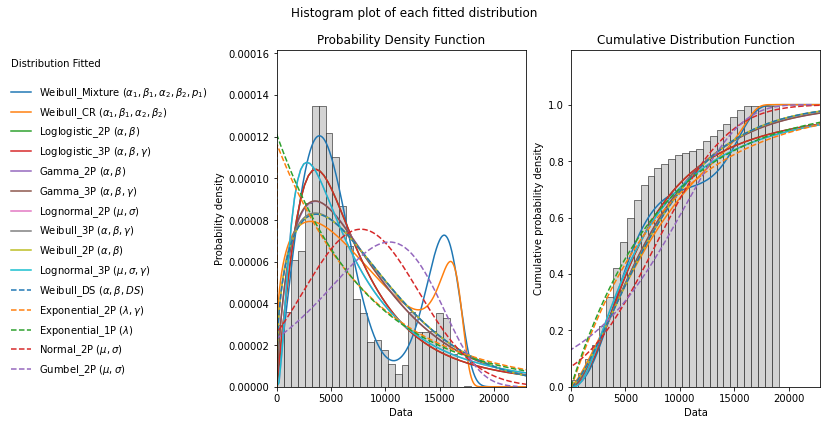

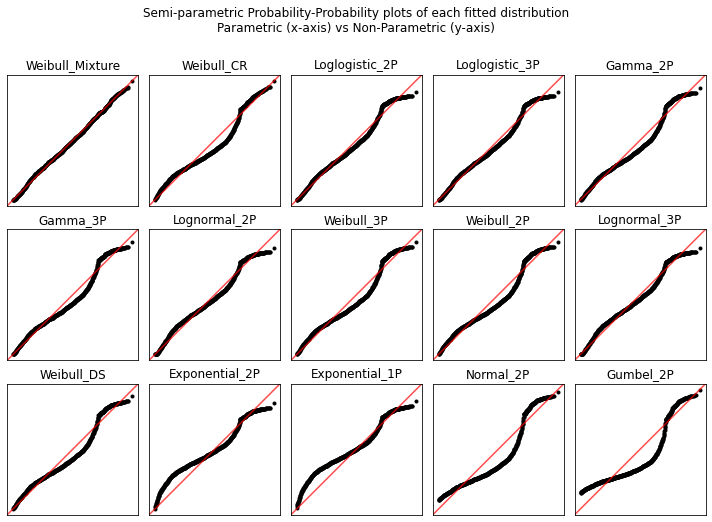

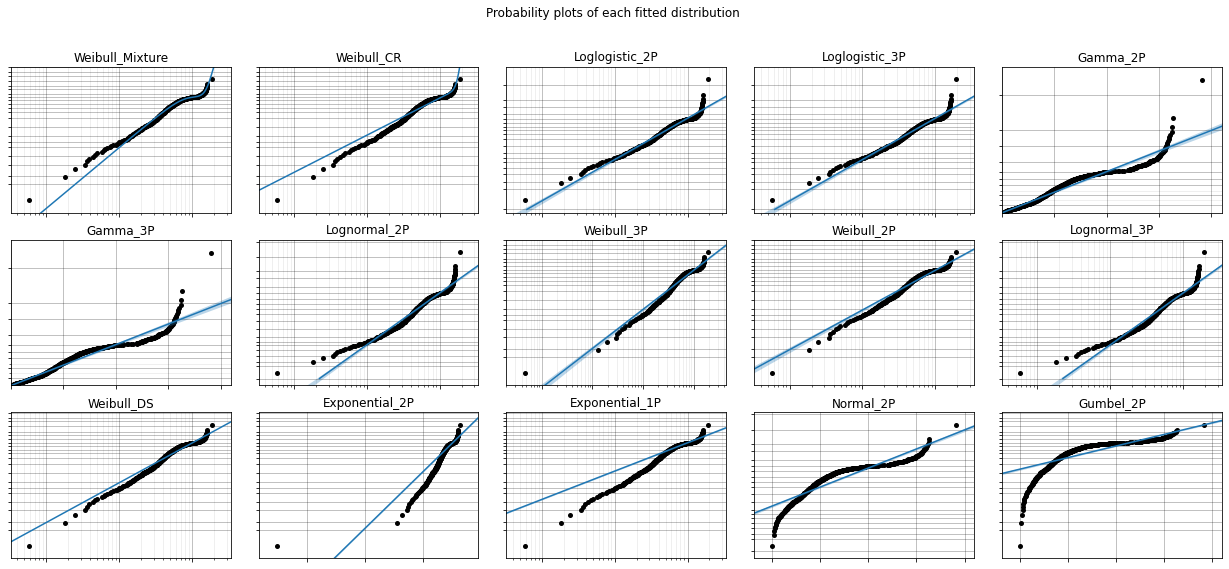

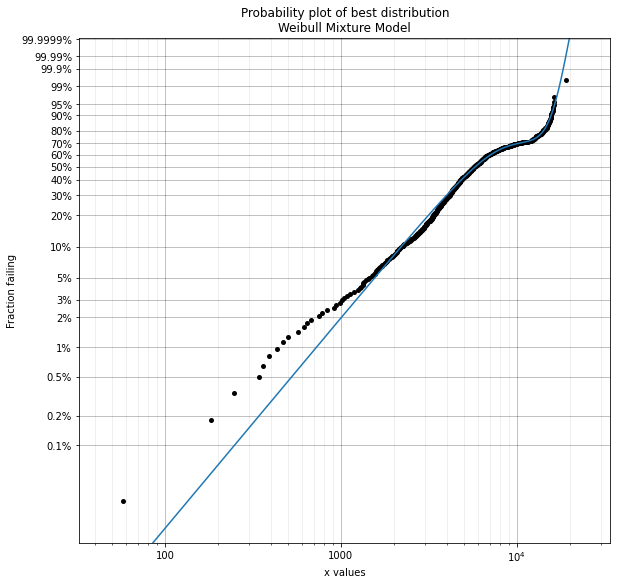

In [30]:
dfA = df.loc[df['product type'] == 'product A']
dfB = df.loc[df['product type'] == 'product B']
dfE1 = df.loc[df['model'].str.endswith('E1')]
dfE2 = df.loc[df['model'].str.endswith('E2')]
dfE3 = df.loc[df['model'].str.endswith('E3')]
dfE1_A = df.loc[(df['model'].str.endswith('E1')) & (df['product type'] == 'product A')]
dfE2_A = df.loc[(df['model'].str.endswith('E2')) & (df['product type'] == 'product A')]
dfE3_A = df.loc[(df['model'].str.endswith('E3')) & (df['product type'] == 'product A')]
dfE1_B = df.loc[(df['model'].str.endswith('E1')) & (df['product type'] == 'product B')]
dfE2_B = df.loc[(df['model'].str.endswith('E2')) & (df['product type'] == 'product B')]
dfE3_B = df.loc[(df['model'].str.endswith('E3')) & (df['product type'] == 'product B')]
get_distribution(dfE1)

